In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta # pip install pandas-ta
import yfinance as yf # pip install yfinance

In [2]:
listings = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIA'] 

In [3]:
df = yf.download(tickers=listings, period='20y', interval= '1d', auto_adjust=False )

[*********************100%***********************]  31 of 31 completed


In [4]:
# stack and unstack indexed columns
df = df.stack(level=0).unstack(level=1)

# set each column name to TICKER - VALUE
df.columns = df.columns.map(lambda x: f'{x[0]} - {x[1]}')

# create date column from index
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

In [5]:
for ticker in listings:
    col_name = f'{ticker} - Dividend'
    div_series = yf.Ticker(ticker).dividends
    series_df = div_series.to_frame(name=col_name)
    series_df.index = series_df.index.tz_convert(None).floor('D')
    df = pd.merge(df, series_df, left_on='Date', right_index=True, how='left')
    df[col_name] = df[col_name].fillna(0)

In [6]:
df[df['MCD - Close'] != 0]

,Date,AAPL - Adj Close,AAPL - Close,AAPL - High,AAPL - Low,AAPL - Open,AAPL - Volume,AMGN - Adj Close,AMGN - Close,AMGN - High,...,NKE - Dividend,PG - Dividend,CRM - Dividend,TRV - Dividend,UNH - Dividend,VZ - Dividend,V - Dividend,WBA - Dividend,WMT - Dividend,DIA - Dividend
0,2003-06-24,0.285034,0.335357,0.351250,0.334286,0.347679,514382400.0,47.883724,65.050003,65.680000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
1,2003-06-25,0.289740,0.340893,0.346429,0.334107,0.336786,329812000.0,47.545109,64.589996,66.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
2,2003-06-26,0.292775,0.344464,0.345000,0.333929,0.333929,161705600.0,48.818577,66.320000,66.470001,...,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.000
3,2003-06-27,0.284275,0.334464,0.344821,0.330000,0.344643,365792000.0,47.979427,65.180000,66.570000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
4,2003-06-30,0.289284,0.340357,0.343036,0.331964,0.333571,222152000.0,48.538872,65.940002,67.220001,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2023-06-16,184.919998,184.919998,186.990005,184.270004,186.729996,101235600.0,229.660004,229.660004,231.949997,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.776
5031,2023-06-20,185.009995,185.009995,186.100006,184.410004,184.410004,49799100.0,228.589996,228.589996,230.839996,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
5032,2023-06-21,183.960007,183.960007,185.410004,182.589996,184.899994,49515700.0,227.039993,227.039993,230.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000
5033,2023-06-22,187.000000,187.000000,187.050003,183.669998,183.740005,51245300.0,229.660004,229.660004,229.880005,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000


In [7]:
df.columns.tolist()

['Date',
 'AAPL - Adj Close',
 'AAPL - Close',
 'AAPL - High',
 'AAPL - Low',
 'AAPL - Open',
 'AAPL - Volume',
 'AMGN - Adj Close',
 'AMGN - Close',
 'AMGN - High',
 'AMGN - Low',
 'AMGN - Open',
 'AMGN - Volume',
 'AXP - Adj Close',
 'AXP - Close',
 'AXP - High',
 'AXP - Low',
 'AXP - Open',
 'AXP - Volume',
 'BA - Adj Close',
 'BA - Close',
 'BA - High',
 'BA - Low',
 'BA - Open',
 'BA - Volume',
 'CAT - Adj Close',
 'CAT - Close',
 'CAT - High',
 'CAT - Low',
 'CAT - Open',
 'CAT - Volume',
 'CRM - Adj Close',
 'CRM - Close',
 'CRM - High',
 'CRM - Low',
 'CRM - Open',
 'CRM - Volume',
 'CSCO - Adj Close',
 'CSCO - Close',
 'CSCO - High',
 'CSCO - Low',
 'CSCO - Open',
 'CSCO - Volume',
 'CVX - Adj Close',
 'CVX - Close',
 'CVX - High',
 'CVX - Low',
 'CVX - Open',
 'CVX - Volume',
 'DIA - Adj Close',
 'DIA - Close',
 'DIA - High',
 'DIA - Low',
 'DIA - Open',
 'DIA - Volume',
 'DIS - Adj Close',
 'DIS - Close',
 'DIS - High',
 'DIS - Low',
 'DIS - Open',
 'DIS - Volume',
 'DOW - A

In [8]:
df.to_csv('dija_w_divs.csv', index=False)

In [9]:
df2 = pd.read_csv('dija_w_divs.csv')

In [10]:
df2.head()

,Date,AAPL - Adj Close,AAPL - Close,AAPL - High,AAPL - Low,AAPL - Open,AAPL - Volume,AMGN - Adj Close,AMGN - Close,AMGN - High,...,NKE - Dividend,PG - Dividend,CRM - Dividend,TRV - Dividend,UNH - Dividend,VZ - Dividend,V - Dividend,WBA - Dividend,WMT - Dividend,DIA - Dividend
0,2003-06-24,0.285034,0.335357,0.351250,0.334286,0.347679,514382400.0,47.883724,65.050003,65.680000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-06-25,0.289740,0.340893,0.346429,0.334107,0.336786,329812000.0,47.545109,64.589996,66.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-06-26,0.292775,0.344464,0.345000,0.333929,0.333929,161705600.0,48.818577,66.320000,66.470001,...,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-06-27,0.284275,0.334464,0.344821,0.330000,0.344643,365792000.0,47.979427,65.180000,66.570000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-06-30,0.289284,0.340357,0.343036,0.331964,0.333571,222152000.0,48.538872,65.940002,67.220001,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Load Data McDonald's (MCD)

## significantmodification is introduced in 
* Sup-port Vector Machines Algorithm(SVMA) which results in higher accuracy rates. Presence of kernel and other parameters make it more flexible.

In [11]:
# insert libraries
import pandas_datareader as pdr  

In [12]:
 df.shape

(5035, 218)

In [13]:
df1= df.reset_index()['MCD - Close']

In [14]:
df1

0        22.530001
1        22.240000
2        22.450001
3        22.370001
4        22.059999
           ...    
5030    293.700012
5031    293.040009
5032    294.519989
5033    293.299988
5034    289.910004
Name: MCD - Close, Length: 5035, dtype: float64

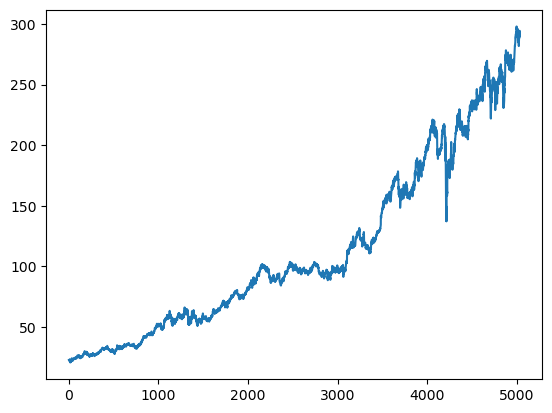

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR

## SVM Algorithm o predict MCD

In [18]:
X = df['Date']
y = df['MCD - Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Reshape the target variable to a 1D array
y_train = np.array(y_train).reshape(-1)


X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [19]:
# Scale the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Train the SVM model
svm = SVR(kernel='rbf')  # You can try different kernel types like 'linear', 'poly', 'sigmoid', etc.
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
y_pred

array([91.63772779, 86.06946087, 28.36682887, ..., 70.02895249,
       81.16845952, 43.07418409])

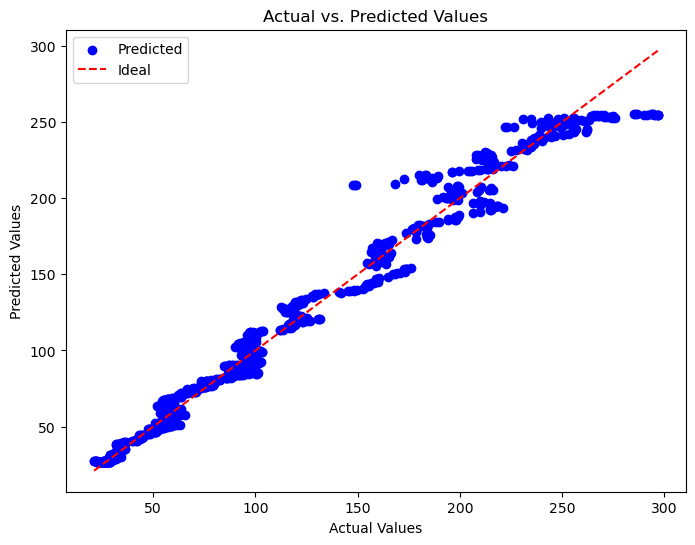

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

In [23]:
yf.pdr_override()

# Define the start and end dates for the data (10 years to train the model)
start_date = "2013-06-01"
end_date = "2023-06-16"

# Fetch the stock data for Dow Jones Industrial Average (DJI)
MCD_data = pdr.get_data_yahoo("^DJI", start=start_date, end=end_date)


# predict for 7 days (1 week) June 17-23, 2023

[*********************100%***********************]  1 of 1 completed


In [24]:
# Extract the "Close" prices as the target variable
target = MCD_data["Close" ].values

# Create a feature matrix using the last 10 years of data
features = np.arange(len(target)).reshape(-1, 1)

# Scale the feature matrix using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [25]:
# Select one stock from the listings
stock_symbol = 'MCD'  # Change this to the desired stock symbol

In [26]:
# Fetch the stock data for the selected stock
stock_data = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [27]:
# Extract the "Close" prices as the target variable
target = stock_data["Close"].values

In [28]:
# Create a feature matrix using the last 10 years of data
features = np.arange(len(target)).reshape(-1, 1)

In [29]:
# Scale the feature matrix using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [30]:
# Selecting the features (X) and the target variable (y)
X = df[['Date']]
y = df['MCD - Close']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

In [32]:
# Initialize and train the SVR model
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [33]:
# Predict on the test set
predictions = svr.predict(X_test)

In [34]:
# Print the predicted prices
print("Predicted prices:", predictions)

Predicted prices: [107.13315215 151.91170035 138.13911849 129.52242625  86.86273679
 168.08565545 142.58872186 117.44493138 219.85643752 131.07625599
 226.00112789  81.56558993 135.59648799 176.98486219  84.67324942
 147.74461147 203.18808204  88.69908104 212.22854603 137.00906049
 102.4716629  171.26394357 115.11418676 130.36996974 222.89346839
 226.77804276 237.01919337  81.42433268 126.2735095  193.93573217
 159.82210634 120.69384813 251.35680423 158.40953384 109.60515402
 148.59215497 187.86167043 227.41370038 150.85227097  97.24514466
 251.14491836 161.30530746  93.64308479 198.45596417 101.0590904
  95.47942903 253.40503435 213.07608953 128.74551137 160.59902121
 167.80314095 210.81597353 232.92273313 172.88840195 125.77910912
 222.18718214 231.65141788 124.50779388 132.27694262 217.17254977
 234.68844875 163.56542346 230.73324576 110.45269752 126.62665262
 198.03219242 254.88823548 255.87703623 147.10895385 216.6781494
 187.64978455 137.78597536 165.47239633 118.22184626 102.118

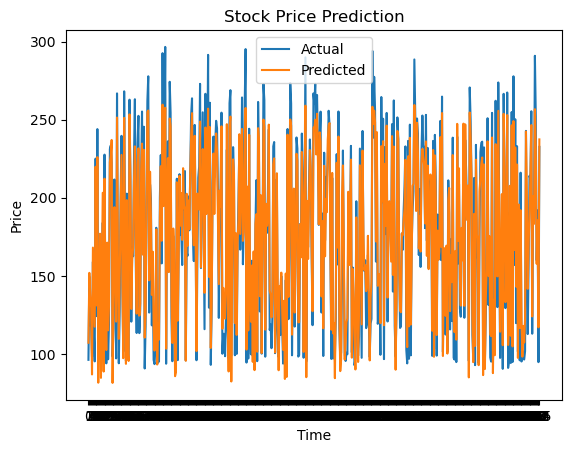

<Figure size 3000x600 with 0 Axes>

In [35]:
# Plotting the actual prices
plt.plot(y_test, label='Actual')
# Plotting the predicted prices
plt.plot(predictions, label='Predicted')

# Set the x-axis labels
plt.xticks(range(len(y_test)))


# Set the plot title and labels
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")

# Show the legend
plt.legend()

plt.figure(figsize=(30, 6))


# Display the plot
plt.show()


In [36]:
def get_latest_stock_data(stock_symbol):
    # Use yfinance to get the historical data for the specified stock symbol
    stock_data = yf.download(MCD, period='1d')
 # Return the latest available data (e.g., the most recent trading day)
    latest_data = stock_data.iloc[-1]

    return latest_data

In [37]:
import yfinance as yf
from sklearn.svm import SVR
import numpy as np

def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Specify the stock symbol, start date, and end date
stock_symbol = 'MCD'
start_date = '2023-06-17'
end_date = '2023-06-23'

# Get the stock data for the specified date range
stock_data = get_stock_data(stock_symbol, start_date, end_date)

# Extract the 'Close' prices as the target variable
prices = stock_data['Close'].values


[*********************100%***********************]  1 of 1 completed


In [38]:
print(stock_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [39]:
# Prepare the features (X) and target variable (y)
X = np.arange(len(prices)).reshape(-1, 1)
y = prices

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X, y)

# Predict the stock prices for the next 7 days
future_X = np.arange(len(prices), len(prices) + 7).reshape(-1, 1)
predicted_prices = svr.predict(future_X)

# Print the predicted prices
print("Predicted Prices:")
for i in range(len(predicted_prices)):
    print(f"Day {i+1}: {predicted_prices[i]}")

Predicted Prices:
Day 1: 293.5299774169922
Day 2: 293.65996704101565
Day 3: 293.7899566650391
Day 4: 293.9199462890625
Day 5: 294.04993591308596
Day 6: 294.1799255371094
Day 7: 294.30991516113284


In [40]:
# Prepare the features (X) and target variable (y)
X = np.arange(len(prices)).reshape(-1, 1)
y = prices

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X, y)

# Predict the stock prices for the next 7 days
future_X = np.arange(len(prices), len(prices) + 7).reshape(-1, 1)
predicted_prices = svr.predict(future_X)

# Print the predicted prices
print("Predicted Prices:")
for i in range(len(predicted_prices)):
    print(f"Day {i+1}: {predicted_prices[i]}")

# Compare with actual prices
actual_prices = stock_data['Close'].values[-7:]

# Print the actual prices
print("\nActual Prices:")
for i in range(len(actual_prices)):
    print(f"Day {i+1}: {actual_prices[i]}")

Predicted Prices:
Day 1: 293.5299774169922
Day 2: 293.65996704101565
Day 3: 293.7899566650391
Day 4: 293.9199462890625
Day 5: 294.04993591308596
Day 6: 294.1799255371094
Day 7: 294.30991516113284

Actual Prices:
Day 1: 293.0400085449219
Day 2: 294.5199890136719
Day 3: 293.29998779296875
